# BHARAT INTERN INTERNSHIP, SEPTEMPBER 2023

# DATA SCIENCE INTERNSHIP

## PROBLEM STATEMENT

### Number Recognition : Handwritten scanned digit images recognition of system handwritten not only detects digits.Handwritten digit recognition using MNIST dataset is a major project made.

## SOLUTION

## AUTHOR : ARITRA BAG

#### MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### IMPORTING LIBRARIES

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns
import sklearn
import keras_tuner

#### IMPORTING THE DATASET

In [ ]:
mnist = keras.datasets.mnist
(x_train_raw,y_train_raw),(x_test_raw,y_test_raw) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train_raw = x_train_raw.reshape(60000,28,28)
x_test_raw = x_test_raw.reshape(10000,28,28)

#### EXPLORATORY DATA ANALYSIS

In [ ]:
print (" The shape of x_train is : " + str(x_train_raw.shape))
print (" The shape of y_train is : " + str(y_train_raw.shape))
print (" The shape of x_test is : " + str(x_test_raw.shape))
print (" The shape of y_test is : " + str(y_test_raw.shape))

 The shape of x_train is : (60000, 28, 28)
 The shape of y_train is : (60000,)
 The shape of x_test is : (10000, 28, 28)
 The shape of y_test is : (10000,)


In [ ]:
x_train_raw = x_train_raw.astype(float)/255.0
x_test_raw = x_test_raw.astype(float)/255.0

#### PLOTTING A VALUE

The corresponding value of the written digit is : 5


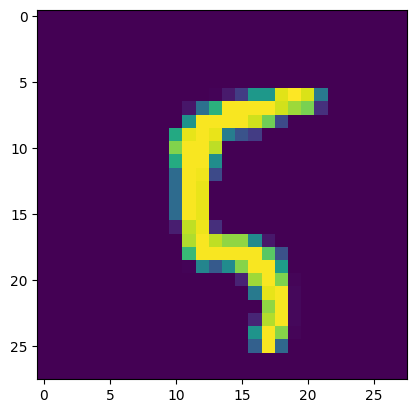

In [ ]:
plt.imshow((x_train_raw[100]).reshape(28,28))
print('The corresponding value of the written digit is : ' + str(y_train_raw[100]))

The corresponding value of the written digit is : 6


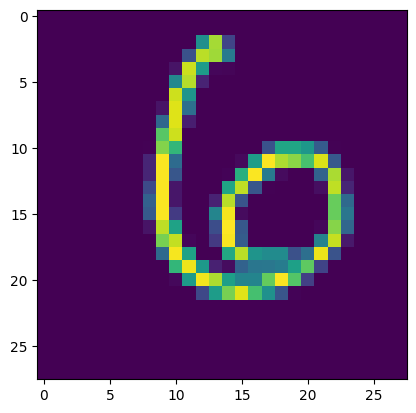

In [ ]:
plt.imshow((x_test_raw[100]).reshape(28,28))
print('The corresponding value of the written digit is : ' + str(y_test_raw[100]))

#### CREATING THE VALIDATION SET AND RANDOMIZATION OF THE TRAINING SET

In [ ]:
num_split = 50000
x_train,x_validate,y_train,y_validate = x_train_raw[:num_split], x_train_raw[num_split:], y_train_raw[:num_split], y_train_raw[num_split:]
shuffle_index = np.random.permutation(num_split)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

The corresponding value of the written digit is : 8


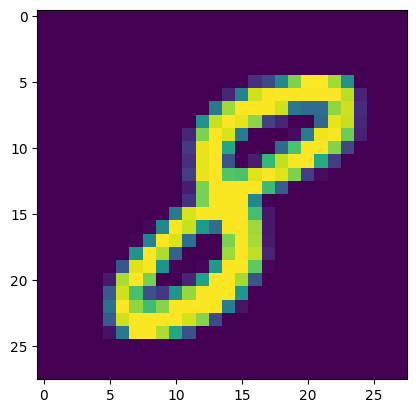

In [ ]:
plt.imshow((x_train[100]).reshape(28,28))
print('The corresponding value of the written digit is : ' + str(y_train[100]))

In [ ]:
print (" The shape of x_train is : " + str(x_train.shape))
print (" The shape of y_train is : " + str(y_train.shape))
print (" The shape of x_validate is : " + str(x_validate.shape))
print (" The shape of y_validate is : " + str(y_validate.shape))

 The shape of x_train is : (50000, 28, 28)
 The shape of y_train is : (50000,)
 The shape of x_validate is : (10000, 28, 28)
 The shape of y_validate is : (10000,)


#### CREATING A FUNCTION TO FIND THE OPTIMAL NEURAL NETWORK USING HYPERPARAMETER TUNING

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [ ]:
def build_model(hp):

   model = keras.models.Sequential()

   model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

   model.add(keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   model.add(keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.05)))

   model.add(keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   model.add(keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05)))

   model.add(keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   model.add(keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05)))

   model.add(keras.layers.Dense(units=hp.Int('dense_4_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_4_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_4_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   model.add(keras.layers.Dense(10,activation='softmax'))

   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='sparse_categorical_crossentropy',
                                          metrics=['accuracy'])

   return model

#### FINDING THE BEST FIT

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

tuner_search = RandomSearch(build_model,objective='val_accuracy', max_trials = 100, directory='output', project_name="digit_recognition")

tuner_search.search(x_train, y_train,epochs = 5, batch_size =256, validation_split=0.1)

Trial 100 Complete [00h 00m 12s]
val_accuracy: 0.10440000146627426

Best val_accuracy So Far: 0.977400004863739
Total elapsed time: 00h 17m 22s


#### FINDING THE BEST MODEL AND BEST HYPERPARAMETERS

In [ ]:
model = tuner_search.get_best_models(num_models=1)[0]
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dense_1_units': 752, 'dense_1_activation': 'selu', 'dense_1_kernel_initializer': 'he_normal', 'dropout_1_rate': 0.30000000000000004, 'dense_2_units': 248, 'dense_2_activation': 'selu', 'dense_2_kernel_initializer': 'glorot_normal', 'dropout_2_rate': 0.1, 'dense_3_units': 872, 'dense_3_activation': 'relu', 'dense_3_kernel_initializer': 'random_normal', 'dropout_3_rate': 0.2, 'dense_4_units': 904, 'dense_4_activation': 'relu', 'dense_4_kernel_initializer': 'random_normal', 'learning_rate': 0.001}


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7da3b0046020>>


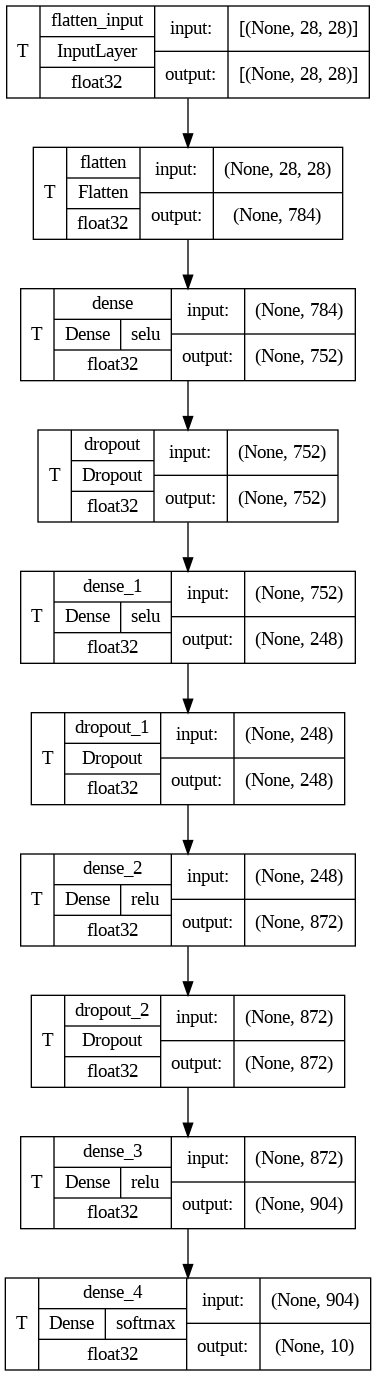

In [ ]:
print(model.summary)
model_name='/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/MNIST ANN/digit_recognizer.png'
keras.utils.plot_model(model, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

#### RECREATING THE MODEL FROM SCRATCH

In [ ]:
digit_classifier = Sequential()
digit_classifier.add(Flatten(input_shape=(28,28)))
digit_classifier.add(Dense(752, activation = 'selu', kernel_initializer = 'he_normal'))
digit_classifier.add(Dropout(0.30000000000000004))
digit_classifier.add(Dense(248, activation = 'selu', kernel_initializer = 'glorot_normal'))
digit_classifier.add(Dropout(0.1))
digit_classifier.add(Dense(872, activation = 'relu', kernel_initializer = 'random_normal'))
digit_classifier.add(Dropout(0.2))
digit_classifier.add(Dense(904, activation = 'relu', kernel_initializer = 'random_normal'))
digit_classifier.add(Dense(10,activation='softmax'))
digit_classifier.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),
                                          loss='sparse_categorical_crossentropy',
                                          metrics=['accuracy'])

### TRAINING AND VALIDATION

In [ ]:
digit_classifier.fit(x_train, y_train, epochs = 100, batch_size = 256, validation_data = (x_validate,y_validate))

Epoch 1/100
196/196 [==============================] - 3s 6ms/step - loss: 0.3176 - accuracy: 0.9011 - val_loss: 0.1301 - val_accuracy: 0.9602
Epoch 2/100
196/196 [==============================] - 1s 5ms/step - loss: 0.1503 - accuracy: 0.9529 - val_loss: 0.0962 - val_accuracy: 0.9699
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 0.1125 - accuracy: 0.9650 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0901 - accuracy: 0.9710 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 5/100
196/196 [==============================] - 1s 7ms/step - loss: 0.0843 - accuracy: 0.9733 - val_loss: 0.0917 - val_accuracy: 0.9717
Epoch 6/100
196/196 [==============================] - 1s 7ms/step - loss: 0.0683 - accuracy: 0.9782 - val_loss: 0.0892 - val_accuracy: 0.9756
Epoch 7/100
196/196 [==============================] - 1s 5ms/step - loss: 0.0686 - accuracy: 0.9771 - val_loss: 0.0780 - val_accuracy: 0.9787

#### TRAINING ANF VALIDATION RESULTS

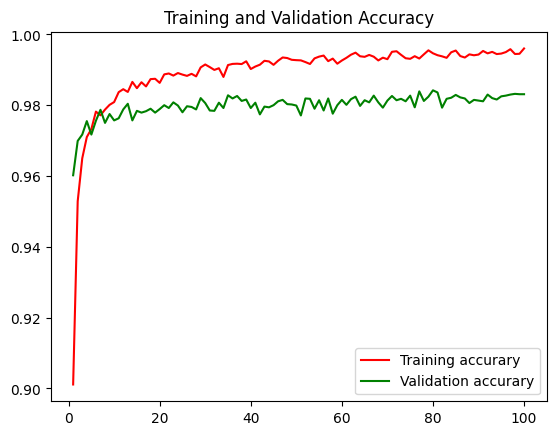

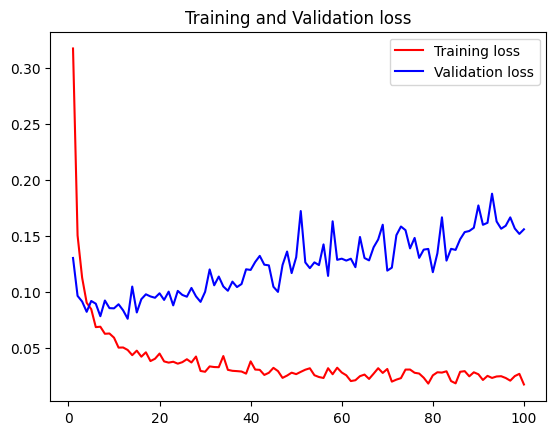

In [ ]:
acc=digit_classifier.history.history['accuracy']
val_acc=digit_classifier.history.history['val_accuracy']
loss=digit_classifier.history.history['loss']
val_loss=digit_classifier.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#### TEST SET IMPLEMENTATION

In [ ]:
y_probability= digit_classifier.predict(x_test_raw)
y_predict = np.argmax(y_probability,axis=1)

313/313 [==============================] - 1s 2ms/step


#### TEST SET RESULTS

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, multilabel_confusion_matrix

print('The classification test results are : \n')
print(classification_report(y_test_raw,y_predict))
print('Confusion Matrix :')
cm=multilabel_confusion_matrix(y_test_raw,y_predict)
print(cm)
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test_raw,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test_raw,y_predict,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test_raw,y_predict,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test_raw,y_predict,average='micro'))*100)
print('\n')
print('The test ROC AUC percentage is :')
print(roc_auc_score(y_test_raw,y_probability,multi_class = 'ovr'))

The classification test results are : 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix :
[[[9010   10]
  [  16  964]]

 [[8854   11]
  [   4 1131]]

 [[8946   22]
  [   7 1025]]

 [[8970   20]
  [  22  988]]

 [[8998   20]
  [  15  967]]

 [[9094   14]
  [  27  865]]

 [

#### SAVING THE MODEL

In [ ]:
digit_classifier.save("/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/MNIST ANN/digit_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
